In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


In [31]:
def processing(fname):
    data = pd.read_csv(fname+".csv")
    data['Date'] = pd.to_datetime(data['Date'])
    data = data[data['Date'] <= datetime.today()-timedelta(days = 7)]
    df = data.pivot_table(index=data.columns[0], columns=data.columns[1], values=data.columns[2]).reset_index()
   
    return df

def plot(df,lab1,lab2,title,log):
    plt.subplot(2, 2, 1)  # 2 rows, 1 column, 1st subplot

    plt.plot(df.iloc[:, 0],df.iloc[:, 1],label = lab1)

    plt.plot(df.iloc[:, 0],df.iloc[:, 2],label = lab2)
    plt.ylabel('Count')
    plt.legend()
    plt.title(title)
    plt.xticks(rotation='vertical')
    if log:
        plt.yscale('log')
    
def correlate(df,method):
    correlation = df.iloc[:, 1].corr((df.iloc[:, 2]),method = method)
    return correlation
def xcorrelate(df,method,minmax_lag):
    correlations = {}

    for lag in range(minmax_lag[0],minmax_lag[1]+ 1):
        shifted = df.iloc[:,1].shift(lag)  # Shift 'X' by 'lag'
        corr = shifted.corr(df.iloc[:,2],method = method)  # Compute correlation with 'Y'
        correlations[lag] = corr

    # Find the lag with the highest absolute correlation
    best_lag = max(correlations, key=lambda k: abs(correlations[k]))
    return correlations, best_lag
def plot_corr(correlations):
    

    plt.subplot(2,2, 2)
    plt.plot(list(correlations.keys()),list(correlations.values()))
    plt.xlabel("Lag (days)")
    plt.ylabel("Correlation Coefficient")
    plt.show()
    
def create_labels(fnames):
    labels = []
    for fname in fnames:
        # Split the file name by spaces
        parts = fname.split()

        # Always take "volume" as the first part of the label
        first_label = parts[0]

        # Join the remaining parts for the second label, 
        # and exclude any unwanted terms like "correlation"
        second_label = " ".join(part for part in parts[1:] if part.lower() != "correlation")

        # Append the pair of labels for this file name to the labels list
        labels.append([first_label, second_label])
    return labels

In [32]:
#cross correlation


 Best Lag: -9 days ,  with correlation: 0.34969194915646373


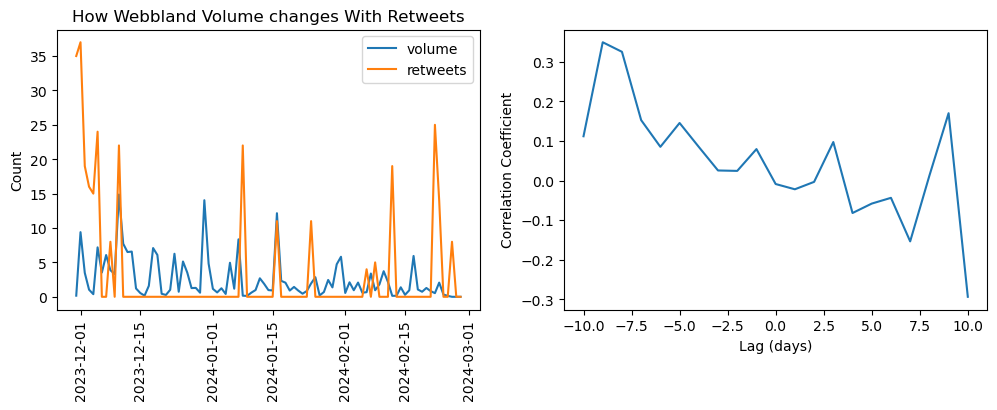


 Best Lag: 7 days ,  with correlation: 0.3591456148295953


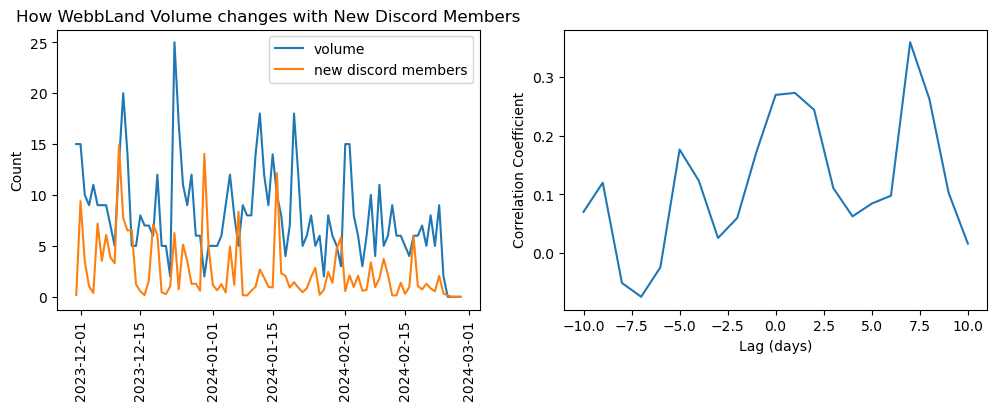


 Best Lag: -1 days ,  with correlation: 0.27232126420475067


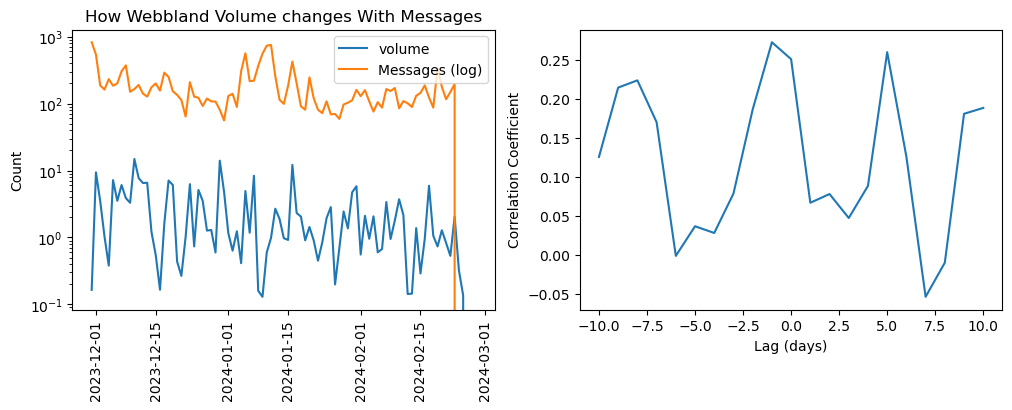

In [34]:

fnames = ["volume retweets", 
          "volume new discord members correlation",
          "volume Messages (log)",
          "volume Impressions (log)",
          "volume EthPrice (log)"]
titles = ["How Webbland Volume changes With Retweets",
          "How WebbLand Volume changes with New Discord Members",
          "How Webbland Volume changes With Messages",
          "How Webbland Volume changes With Impressions",
          "How Webbland Volume changes With Ethereum Price"
        ]


labels = create_labels(fnames)

def plots(i):

    log = "log" in fnames[i]
    plt.figure(figsize=(12, 8)) 
    df = processing(fnames[i])
    plot(df,labels[i][0],labels[i][1],titles[i],log)
    correlations, best_lag = xcorrelate(df,"spearman",[-10,10])
    #print("Lagged Correlations:", correlations)
    print( "\n Best Lag:", best_lag,"days" , ",  with correlation:", correlations[best_lag])
    plot_corr(correlations)
    #plt.show()
    
plots(0)
plots(1)
plots(2)



 Best Lag: -9 days ,  with correlation: 0.3522852338129879


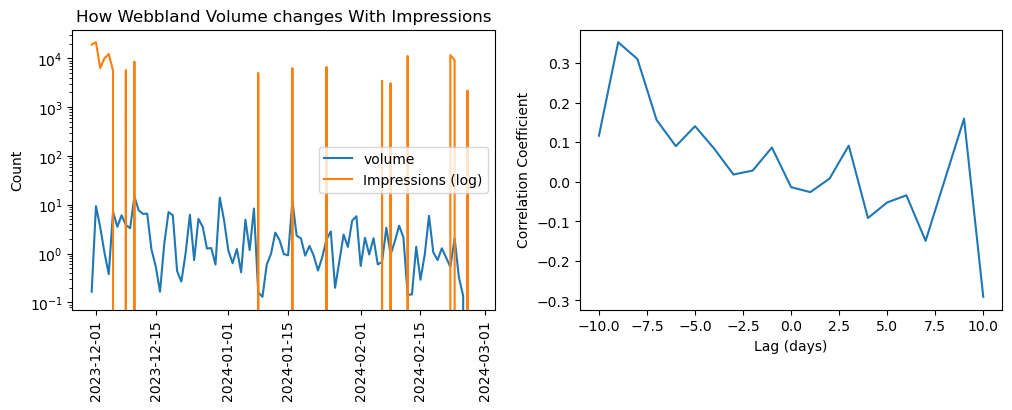


 Best Lag: -6 days ,  with correlation: -0.47655807236132636


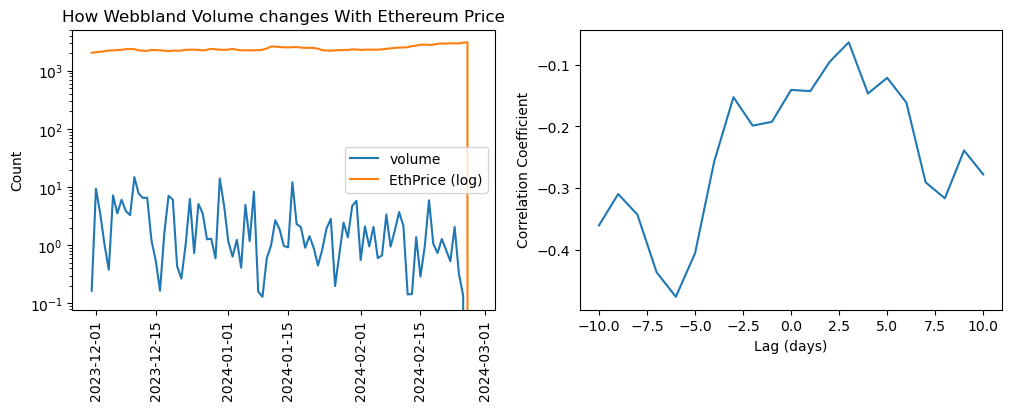

In [35]:
plots(3)
plots(4)


Using Pearson correlation:
Peak correlation at 0.41 when volume lags behind retweets by 8 days. 
Peak correlation at 0.34 when discord members lags behind volume by 7 days
Peak correlation 0.23 when volume lags behind messages by 10 days but almost as much correlation when messages lag behind volume by ~5 days.
Peak correlation 0.41 when volume lags behind retweets by 9 days
Negative correlation between volume and ethprice ie less volume when ethprice is high .

Using Spearman's correlation:
Peak correlation at 0.34 when volume lags behind retweets by 9 days. 
Peak correlation at 0.36 when discord members lags behind volume by 7 days
Peak correlation 0.27 when volume lags behind messages by 8 days but almost as much correlation when messages lag behind volume by ~5 days.
Peak correlation 0.34 when volume lags behind retweets by 9 days
Negative correlation between volume and ethprice ie less volume when ethprice is high (increases with lag in either direction peaking at ~ +/- 7 days

## Conclusions

Similar levels of low-moderate correlation 0.3-0.4, however due to the constraints of a limited amount of data and the anticipated presence of noise, this correlation is likely meaningful.

The analysis reveals a trend where volume increases several days after a  surge in discord activity (new members & rate of messages) increases. Conversely twitter activity, asd measured by retweets & impressions, typically increases following periods of high volume.

Given these insights, placing an emphasis on growing the Discord community could provide the most optimal route to drive volume.